# **📘 Linear Regression – Brain Tumor MRI Dataset**


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Load Preprocessed Data:


In [70]:
data = np.load("brain_mri_preprocessed.npz")
X_train, y_train = data["X_train"], data["y_train"]
X_test, y_test = data["X_test"], data["y_test"]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5521, 16384)
Test shape: (1205, 16384)


# Prepare Data:

In [71]:

# Add bias term (x0 = 1)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize theta vector with zeros
theta = np.zeros((X_train_b.shape[1], 1))

# Reshape y to column vectors
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"Train X: {X_train_b.shape}, y: {y_train.shape}")
print(f"Test X:  {X_test_b.shape}, y: {y_test.shape}")


Train X: (5521, 16385), y: (5521, 1)
Test X:  (1205, 16385), y: (1205, 1)


# 🔧 Normalize Features

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Reshape targets
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Initialize theta
theta = np.zeros((X_train_b.shape[1], 1))

print(f"✅ Data normalized: mean={X_train_scaled.mean():.3f}, std={X_train_scaled.std():.3f}")

✅ Data normalized: mean=-0.000, std=1.000


# 📉 Compute Cost Function

In [73]:
def computeCost(X, y, theta):
    """
    Compute the cost for linear regression.
    """
    m = len(y)
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return J

# Test initial cost
initial_cost = computeCost(X_train_b, y_train, theta)
print(f"Initial cost (theta zeros): {initial_cost:.4f}")


Initial cost (theta zeros): 0.3712


# Gradient Descent Implementation

In [74]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        h = np.dot(X, theta)
        grad = (1 / m) * np.dot(X.T, (h - y))
        theta = theta - alpha * grad

        # Evitar overflow (gradiente explode)
        theta = np.clip(theta, -1e6, 1e6)

        J = computeCost(X, y, theta)
        if np.isnan(J) or np.isinf(J):
            print(f"⚠️ Divergence detected at iteration {i}")
            break
        J_history.append(J)

    return theta, J_history


# Hyperparameters
alpha = 0.0001   # antes era 0.01
iterations = 500

theta_opt, J_history = gradientDescent(X_train_b, y_train, theta, alpha, iterations)

print(f"✅ Final cost: {J_history[-1]:.6f}")
print(f"First 5 theta values: {theta_opt[:5].ravel()}")


✅ Final cost: 0.267387
First 5 theta values: [ 0.03621089 -0.00021252 -0.00051122 -0.00043559 -0.00041837]


# 📈 Cost Function Convergence

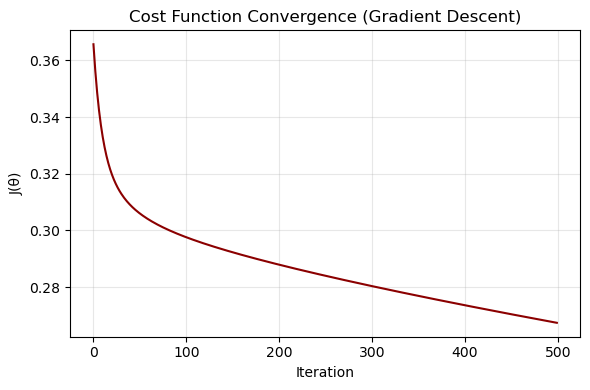

In [75]:
plt.figure(figsize=(6,4))
plt.plot(J_history, color='darkred')
plt.title("Cost Function Convergence (Gradient Descent)")
plt.xlabel("Iteration")
plt.ylabel("J(θ)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 🤖 Predictions and Evaluation

In [77]:
# Predict on test set
y_pred = np.dot(X_test_b, theta_opt)

# Compute evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (MSE): {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")

📉 Mean Squared Error (MSE): 0.6019
📈 R² Score: -2.1569


# 🎯 Predicted vs Actual Values

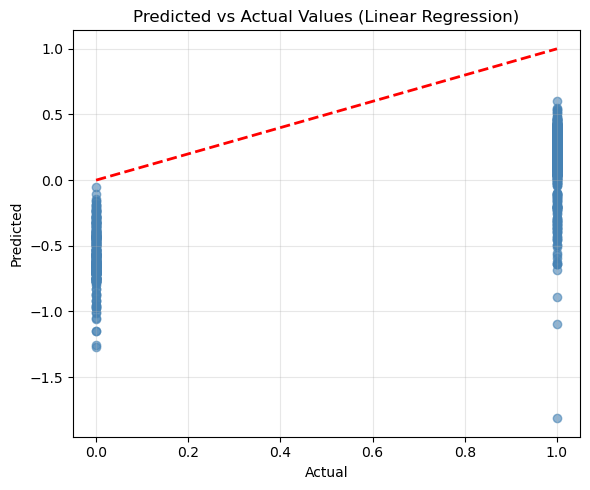

In [78]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, color='steelblue', alpha=0.6)
plt.plot([0,1], [0,1], 'r--', linewidth=2)
plt.title("Predicted vs Actual Values (Linear Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# 📊 Distribution of Prediction Errors

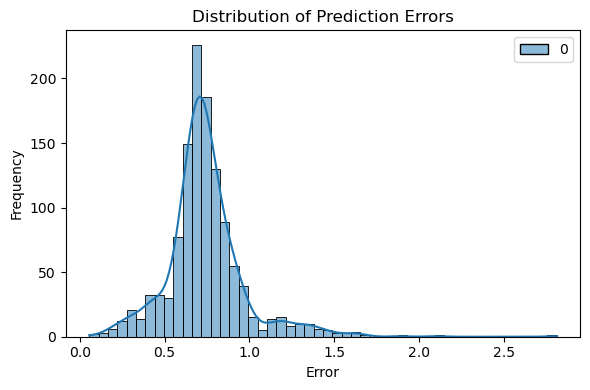

In [80]:
errors = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(errors, bins=50, kde=True, color='darkred')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 🧮 Weight Visualization

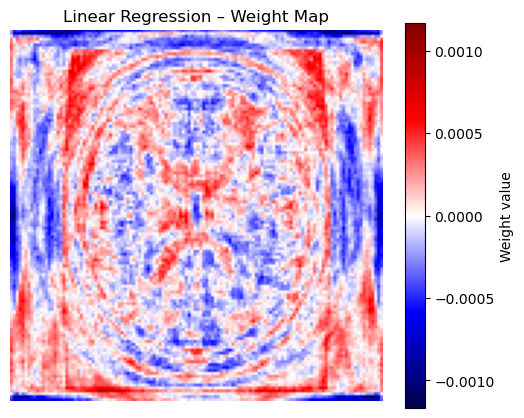

In [82]:
weights = theta_opt[1:].reshape(128, 128)  # remove bias term

plt.figure(figsize=(6,5))
plt.imshow(weights, cmap='seismic', vmin=-np.max(abs(weights)), vmax=np.max(abs(weights)))
plt.colorbar(label="Weight value")
plt.title("Linear Regression – Weight Map")
plt.axis('off')
plt.show()


# 🧩 Evaluate Linear Regression as Classifier


🧮 Classification Metrics (Threshold = 0.5)
--------------------------------------------
Accuracy : 0.2622
Precision: 1.0000
Recall   : 0.0078
F1-score : 0.0155



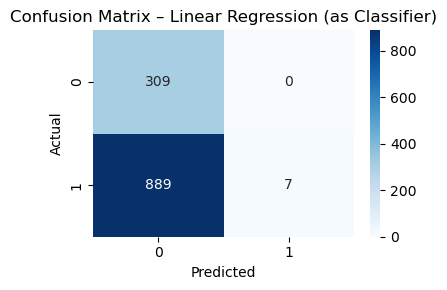

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

threshold = 0.5
y_pred_class = (y_pred >= threshold).astype(int)

acc = accuracy_score(y_test, y_pred_class)
prec = precision_score(y_test, y_pred_class)
rec = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"""
🧮 Classification Metrics (Threshold = {threshold})
--------------------------------------------
Accuracy : {acc:.4f}
Precision: {prec:.4f}
Recall   : {rec:.4f}
F1-score : {f1:.4f}
""")

cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Linear Regression (as Classifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# ==========================
# Summary
# ==========================


In [86]:
print(f"""
📊 Linear Regression Summary
----------------------------
Train Samples: {X_train.shape[0]}
Test Samples:  {X_test.shape[0]}
Features:      {X_train.shape[1]}
MSE:           {mse:.4f}
R² Score:      {r2:.4f}
""")


📊 Linear Regression Summary
----------------------------
Train Samples: 5521
Test Samples:  1205
Features:      16384
MSE:           0.6019
R² Score:      -2.1569



In [87]:
# Save metrics for comparison
import json

results = {
    "Model": "Linear Regression",
    "MSE": round(mse, 4),
    "R2": round(r2, 4),
    "Accuracy": round(acc, 4),
    "Precision": round(prec, 4),
    "Recall": round(rec, 4),
    "F1": round(f1, 4)
}

with open("results_linear_regression.json", "w") as f:
    json.dump(results, f, indent=4)

print("Saved Linear Regression results to 'results_linear_regression.json'")


Saved Linear Regression results to 'results_linear_regression.json'
